In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import matplotlib.pyplot as plt
import motorlab as ml
import numpy as np
import seaborn as sns
import sklearn
import yaml

In [3]:
os.chdir(Path().resolve().parent)

In [4]:
runs_map = {
    "20250711111003": {
        "folder": "config/pose_and_spike_count_to_position/",
        "label": "Poses + M1",
    },
    "20250711113101": {
        "folder": "config/pose_and_spike_count_to_position/",
        "label": "Poses + PMd",
    },
    "20250711103738": {
        "folder": "config/pose_and_spike_count_to_position/",
        "label": "Poses + M1 + PMd",
    },
    "20250710162620": {
        "folder": "config/pose_to_position/",
        "label": "Poses",
    },
}

In [14]:
runs_map = {
    "20250710162620": {
        "folder": "config/pose_to_position/",
        "label": "Poses",
    },
    "20250710230142": {
        "folder": "config/pose_to_position/",
        "label": "Poses - Head",
    },
    "20250710232432": {
        "folder": "config/pose_to_position/",
        "label": "Poses - Limbs",
    },
    "20250710234620": {
        "folder": "config/pose_to_position/",
        "label": "Tail",
    },
}

In [5]:
results = {
    "session": [],
    "monkey": [],
    "label": [],
    "r2": [],
    "acc": [],
}

for run in runs_map:
    CONFIG_PATH = Path(f"{runs_map[run]['folder']}/{run}.yaml")

    with open(CONFIG_PATH, "r") as f:
        config = yaml.safe_load(f)

    eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

    for session in eval_preds:
        eval_gts[session] = eval_gts[session].reshape(-1, 2)
        eval_preds[session] = eval_preds[session].reshape(-1, 2)
        results["session"].append(session)
        results["monkey"].append("bex" if "bex" in session else "ken")
        results["label"].append(runs_map[run]["label"])
        results["r2"].append(
            sklearn.metrics.r2_score(
                eval_gts[session].ravel(), eval_preds[session].ravel()
            )
        )
        results["acc"].append(
            ml.metrics.balanced_accuracy(
                ml.room.get_tiles(
                    eval_gts[session][:, 0], eval_gts[session][:, 1]
                ),
                ml.room.get_tiles(
                    eval_preds[session][:, 0], eval_preds[session][:, 1]
                ),
            )
        )

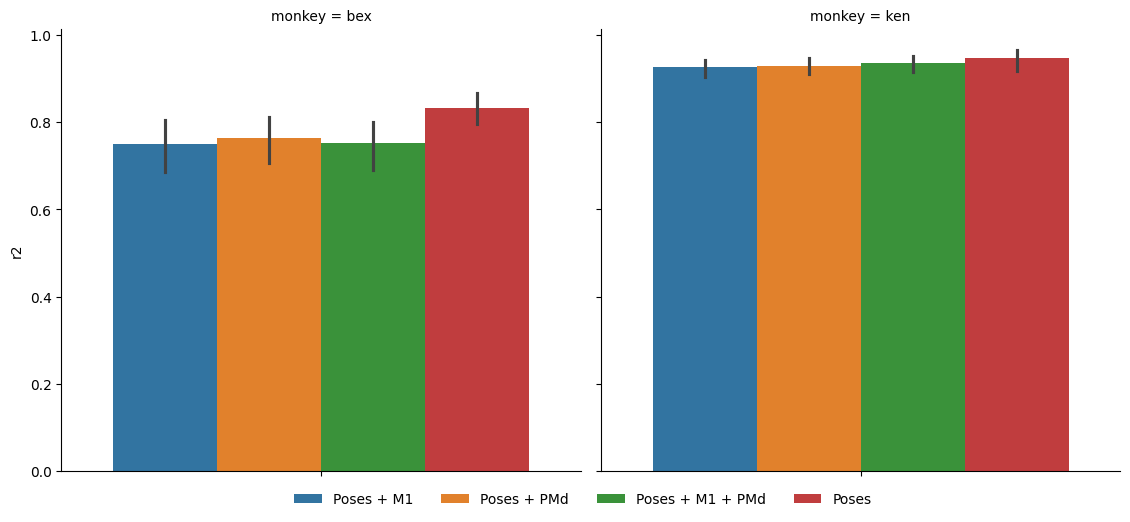

In [8]:
g = sns.catplot(
    data=results,
    hue="label",
    y="r2",
    col="monkey",
    kind="bar",
    col_wrap=3,
)

handles, labels = (
    g._legend.legend_handles,
    [t.get_text() for t in g._legend.texts],
)
g._legend.remove()
g.fig.legend(
    handles,
    labels,
    title="",
    ncol=4,
    loc="center",
    bbox_to_anchor=(0.35, -0.01),
    frameon=False,
)
plt.tight_layout()

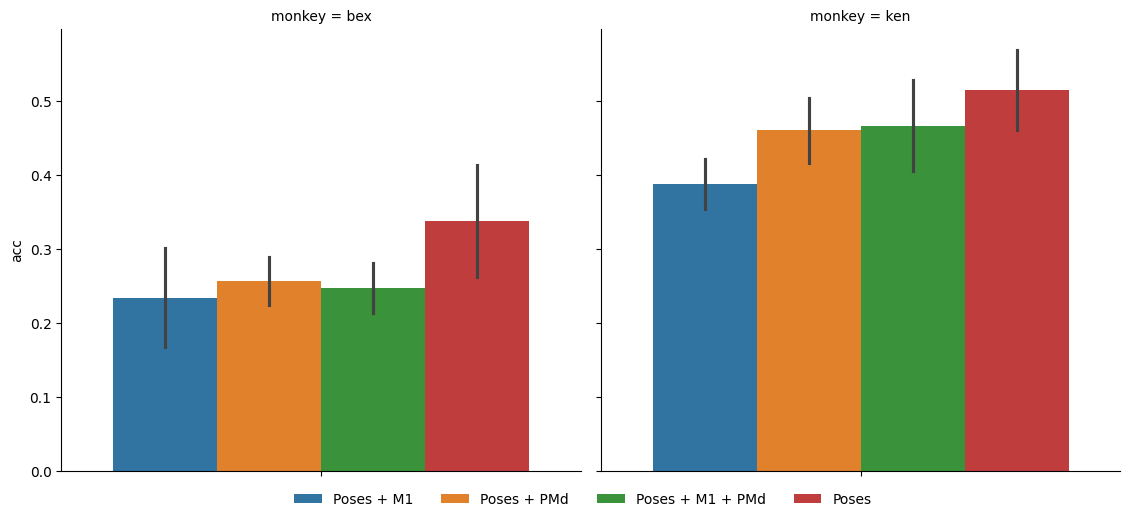

In [9]:
g = sns.catplot(
    data=results,
    hue="label",
    y="acc",
    col="monkey",
    kind="bar",
    errorbar="sd",
    col_wrap=3,
)

handles, labels = (
    g._legend.legend_handles,
    [t.get_text() for t in g._legend.texts],
)
g._legend.remove()
g.fig.legend(
    handles,
    labels,
    title="",
    ncol=4,
    loc="center",
    bbox_to_anchor=(0.35, -0.01),
    frameon=False,
)
plt.tight_layout()